Predict (before training) 4 4.0
Epoch: 0 w= 1.0933333333333333 loss= 4.666666666666667
Epoch: 1 w= 1.1779555555555554 loss= 3.8362074074074086
Epoch: 2 w= 1.2546797037037036 loss= 3.1535329869958857
Epoch: 3 w= 1.3242429313580246 loss= 2.592344272332262
Epoch: 4 w= 1.3873135910979424 loss= 2.1310222071581117
Epoch: 5 w= 1.4444976559288012 loss= 1.7517949663820642
Epoch: 6 w= 1.4963445413754464 loss= 1.440053319920117
Epoch: 7 w= 1.5433523841804047 loss= 1.1837878313441108
Epoch: 8 w= 1.5859728283235668 loss= 0.9731262101573632
Epoch: 9 w= 1.6246153643467005 loss= 0.7999529948031382
Epoch: 10 w= 1.659651263674342 loss= 0.6575969151946154
Epoch: 11 w= 1.6914171457314033 loss= 0.5405738908195378
Epoch: 12 w= 1.7202182121298057 loss= 0.44437576375991855
Epoch: 13 w= 1.7463311789976905 loss= 0.365296627844598
Epoch: 14 w= 1.7700069356245727 loss= 0.3002900634939416
Epoch: 15 w= 1.7914729549662791 loss= 0.2468517784170642
Epoch: 16 w= 1.8109354791694263 loss= 0.2029231330489788
Epoch: 17 w= 

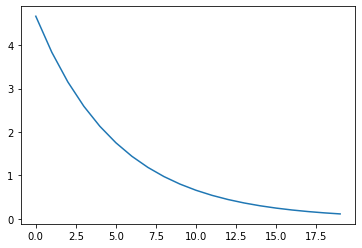

In [12]:
import torch 
import numpy as np
import matplotlib.pyplot as plt
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]
w=1.0
def forword(x):
    return w*x
def cost(xs,ys):
    cost=0
    for x,y in zip(xs,ys):#zip()将xs，ys的值一一对应生成坐标点
        y_pred=forword(x)
        cost+=(y_pred-y)**2
    return cost/len(xs)
def gradient(xs,ys):
    grad=0
    for x,y in zip(xs,ys):
        grad+=2*x*(w*x-y)# 对损失函数求导，要使损失函数最小
    return grad/len(xs)
print('Predict (before training)',4,forword(4))
loss=[]
for epoch in range(20):
    cost_val=cost(x_data,y_data)
    grad_val=gradient(x_data,y_data)
    w-=0.01*grad_val
    loss.append(cost_val)
    print('Epoch:',epoch,'w=',w,'loss=',cost_val)
print('Predict(after training)',4,forword(4))
plt.plot(loss)
w=1.0
def forward(x):
    return w*x
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
def gradient(x,y):
    return 2*x*(w*x-y)
print('predict (before training)',4,forward(4))
loss_=[]
for epoch in range(100):
    for x,y in zip(x_data,y_data):
        grad=gradient(x,y)
        w=w-0.01*grad
        print("\tgrad:",x,y,grad)
        l=loss(x,y)
        loss_.append(l)
    print('progress:',epoch,'w=',w,'loss=',1)
print('Predict (after training)',4,forward(4))


In [13]:
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]
w=torch.Tensor([1.0])#创建张量，并初始化为1.0
w.requires_grad=True#需要计算梯度
def forward(x):
    return x*w #此时的w为张量，但x可能不是张量，所以x会自动转换成张量进行数乘
                #返回的计算值自动需要计算梯度，因为w设置为了需要计算梯度
# torch是动态的构建计算图
def loss(x,y):
    y_pred=forward(x)
    return (y_pred-y)**2
print('predict (before training)',4,forward(4).item())

for epoch in range(100):
    for x,y in zip(x_data,y_data):
        l=loss(x,y)
        l.backward()# 自动计算反向传播
        print('\tgrad:',x,y,w.grad.item())
        w.data=w.data-0.01*w.grad.data# 更新w张量里的值，必须用data
        w.grad.data.zero_()#对当前的w.grad 的值归零，下次计算会有一个新的w.grad，若不将之前的清零，
                        #后面计算的就会跟前面计算的叠加在一起
        # 计算完以后计算图会被释放
    print('progress:',epoch,l.item())
    print('predict (after training):',4,forward(4).item())

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
predict (after training): 4 5.042752265930176
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
predict (after training): 4 5.813671112060547
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
predict (after training): 4 6.383620738983154
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
predict (after training): 4 6.804991722106934
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
predict (after training): 4 7.116515636444092
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 

	grad: 3.0 6.0 -5.7220458984375e-06
progress: 55 9.094947017729282e-13
predict (after training): 4 7.999998569488525
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 56 9.094947017729282e-13
predict (after training): 4 7.999998569488525
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 57 9.094947017729282e-13
predict (after training): 4 7.999998569488525
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 58 9.094947017729282e-13
predict (after training): 4 7.999998569488525
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
progress: 59 9.094947017729282e-13
predict (after training): 4 7.999998569488525
	grad: 1.0 2.0 -7.152557373046875e-07
	grad: 2.0 4.0 -2.86102294921875e-06
	grad: 3.0 6.0 -5.7220458984375e-06
prog

In [14]:
x_data=torch.Tensor([[1.0],[2.0],[3.0]])
y_data=torch.Tensor([[2.0],[4.0],[6.0]])
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel,self).__init__()
        self.linear=torch.nn.Linear(1,1)#构造一个对象，包含权重与偏置
                                        #参数1：输入维度，参数2：输出维度，参数3：bias 默认为True
    def forward(self,x):
        y_pred=self.linear(x)
        return y_pred
model=LinearModel()
criterion=torch.nn.MSELoss(size_average=False)#损失值  参数1：是否求均值，参数2：是否求和（将维度降下来）
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)#优化器 ：参数1：对哪些参数进行优化，参数2：学习步长
for epoch in range(1000):
    y_pred=model.forward(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print('w=',model.linear.weight.item())
print('b=',model.linear.bias.item())
x_test=torch.Tensor([[4.0]])
y_test=model.forward(x_test)
print(y_test)

0 tensor(47.4305, grad_fn=<MseLossBackward>)
1 tensor(21.2197, grad_fn=<MseLossBackward>)
2 tensor(9.5498, grad_fn=<MseLossBackward>)
3 tensor(4.3533, grad_fn=<MseLossBackward>)
4 tensor(2.0385, grad_fn=<MseLossBackward>)
5 tensor(1.0065, grad_fn=<MseLossBackward>)
6 tensor(0.5457, grad_fn=<MseLossBackward>)
7 tensor(0.3392, grad_fn=<MseLossBackward>)
8 tensor(0.2458, grad_fn=<MseLossBackward>)
9 tensor(0.2029, grad_fn=<MseLossBackward>)
10 tensor(0.1825, grad_fn=<MseLossBackward>)
11 tensor(0.1721, grad_fn=<MseLossBackward>)
12 tensor(0.1661, grad_fn=<MseLossBackward>)
13 tensor(0.1622, grad_fn=<MseLossBackward>)
14 tensor(0.1592, grad_fn=<MseLossBackward>)
15 tensor(0.1566, grad_fn=<MseLossBackward>)
16 tensor(0.1542, grad_fn=<MseLossBackward>)
17 tensor(0.1519, grad_fn=<MseLossBackward>)
18 tensor(0.1497, grad_fn=<MseLossBackward>)
19 tensor(0.1475, grad_fn=<MseLossBackward>)
20 tensor(0.1454, grad_fn=<MseLossBackward>)
21 tensor(0.1433, grad_fn=<MseLossBackward>)
22 tensor(0.1412, 

240 tensor(0.0060, grad_fn=<MseLossBackward>)
241 tensor(0.0059, grad_fn=<MseLossBackward>)
242 tensor(0.0058, grad_fn=<MseLossBackward>)
243 tensor(0.0058, grad_fn=<MseLossBackward>)
244 tensor(0.0057, grad_fn=<MseLossBackward>)
245 tensor(0.0056, grad_fn=<MseLossBackward>)
246 tensor(0.0055, grad_fn=<MseLossBackward>)
247 tensor(0.0054, grad_fn=<MseLossBackward>)
248 tensor(0.0054, grad_fn=<MseLossBackward>)
249 tensor(0.0053, grad_fn=<MseLossBackward>)
250 tensor(0.0052, grad_fn=<MseLossBackward>)
251 tensor(0.0051, grad_fn=<MseLossBackward>)
252 tensor(0.0051, grad_fn=<MseLossBackward>)
253 tensor(0.0050, grad_fn=<MseLossBackward>)
254 tensor(0.0049, grad_fn=<MseLossBackward>)
255 tensor(0.0048, grad_fn=<MseLossBackward>)
256 tensor(0.0048, grad_fn=<MseLossBackward>)
257 tensor(0.0047, grad_fn=<MseLossBackward>)
258 tensor(0.0046, grad_fn=<MseLossBackward>)
259 tensor(0.0046, grad_fn=<MseLossBackward>)
260 tensor(0.0045, grad_fn=<MseLossBackward>)
261 tensor(0.0044, grad_fn=<MseLos

484 tensor(0.0002, grad_fn=<MseLossBackward>)
485 tensor(0.0002, grad_fn=<MseLossBackward>)
486 tensor(0.0002, grad_fn=<MseLossBackward>)
487 tensor(0.0002, grad_fn=<MseLossBackward>)
488 tensor(0.0002, grad_fn=<MseLossBackward>)
489 tensor(0.0002, grad_fn=<MseLossBackward>)
490 tensor(0.0002, grad_fn=<MseLossBackward>)
491 tensor(0.0002, grad_fn=<MseLossBackward>)
492 tensor(0.0002, grad_fn=<MseLossBackward>)
493 tensor(0.0002, grad_fn=<MseLossBackward>)
494 tensor(0.0002, grad_fn=<MseLossBackward>)
495 tensor(0.0002, grad_fn=<MseLossBackward>)
496 tensor(0.0001, grad_fn=<MseLossBackward>)
497 tensor(0.0001, grad_fn=<MseLossBackward>)
498 tensor(0.0001, grad_fn=<MseLossBackward>)
499 tensor(0.0001, grad_fn=<MseLossBackward>)
500 tensor(0.0001, grad_fn=<MseLossBackward>)
501 tensor(0.0001, grad_fn=<MseLossBackward>)
502 tensor(0.0001, grad_fn=<MseLossBackward>)
503 tensor(0.0001, grad_fn=<MseLossBackward>)
504 tensor(0.0001, grad_fn=<MseLossBackward>)
505 tensor(0.0001, grad_fn=<MseLos

760 tensor(3.2380e-06, grad_fn=<MseLossBackward>)
761 tensor(3.1928e-06, grad_fn=<MseLossBackward>)
762 tensor(3.1466e-06, grad_fn=<MseLossBackward>)
763 tensor(3.1013e-06, grad_fn=<MseLossBackward>)
764 tensor(3.0563e-06, grad_fn=<MseLossBackward>)
765 tensor(3.0124e-06, grad_fn=<MseLossBackward>)
766 tensor(2.9695e-06, grad_fn=<MseLossBackward>)
767 tensor(2.9261e-06, grad_fn=<MseLossBackward>)
768 tensor(2.8847e-06, grad_fn=<MseLossBackward>)
769 tensor(2.8436e-06, grad_fn=<MseLossBackward>)
770 tensor(2.8019e-06, grad_fn=<MseLossBackward>)
771 tensor(2.7615e-06, grad_fn=<MseLossBackward>)
772 tensor(2.7226e-06, grad_fn=<MseLossBackward>)
773 tensor(2.6831e-06, grad_fn=<MseLossBackward>)
774 tensor(2.6443e-06, grad_fn=<MseLossBackward>)
775 tensor(2.6069e-06, grad_fn=<MseLossBackward>)
776 tensor(2.5692e-06, grad_fn=<MseLossBackward>)
777 tensor(2.5316e-06, grad_fn=<MseLossBackward>)
778 tensor(2.4952e-06, grad_fn=<MseLossBackward>)
779 tensor(2.4597e-06, grad_fn=<MseLossBackward>)


In [15]:
batchSize=1 #序列的个数
seqLen=3 #序列长度
inputSize=4 #每个元素具有的维度
hiddenSize=2 #输出维度

'''
input.shape=(batchSize,inputSize)
output.shape=(batchSize,hiddenSize)#h0

dataset.shape=(seqLen,batchSize,inputSize)
'''
batch_size=1
seq_len=3
input_size=4
hidden_size=2

cell=torch.nn.RNNCell(input_size=input_size,hidden_size=hidden_size)
dataset=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(batch_size,hidden_size)

for idx,input in enumerate(dataset):
    print('='*20,idx,'='*20)
    hidden=cell(input,hidden)
    
    print('outputs size:',hidden.shape)
    print(hidden)
batch_size=1
seq_len=3
input_size=4
hidden_size=2
num_layers=1

cell=torch.nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers)
inputs=torch.randn(seq_len,batch_size,input_size)
hidden=torch.zeros(num_layers,batch_size,hidden_size)

out,hidden=cell(inputs,hidden) #out为每次循环的h，hidden为最后一个循环的h
#inputs的维度：seq_len，batch，input_size
#hidden的维度：numlayers，batch，hidden_size
#out的维度：seqlen，batch，hidden——size
#hidden 的维度：与前面的hidden相同
input_size=4
hidden_size=4
batch_size=1
idx2char=['e','h','l','o']
x_data=[1,0,2,2,3]#hello#(5*1)5为seqlen
y_data=[3,1,2,3,2]#ohlol
one_hot_lookup=[[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]]
x_one_hot=[one_hot_lookup[x] for x in x_data]
x_one_hot#(5*4)#4为input_size
inputs=torch.Tensor(x_one_hot).view(-1,batch_size,input_size)#view相当于reshape,(5*1*4)
labels=torch.LongTensor(y_data).view(-1,1)
input_size=4
hidden_size=4
batch_size=1
idx2char=['e','h','l','o']
x_data=[1,0,2,2,3]#hello
y_data=[3,1,2,3,2]#ohlol
one_hot_lookup=[[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]]
x_one_hot=[one_hot_lookup[x] for x in x_data]

inputs=torch.Tensor(x_one_hot).view(-1,batch_size,input_size)#view相当于reshape
labels=torch.LongTensor(y_data).view(-1,1)#(seqlen,batch)

class Model(torch.nn.Module):
    def __init__(self,batch_size,input_size,hidden_size):
        super(Model,self).__init__()
        self.batch_size=batch_size
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnncell=torch.nn.RNNCell(input_size=self.input_size,hidden_size=self.hidden_size)
        
    def forward(self,input,hidden):
        hidden=self.rnncell(input,hidden)
        return hidden
    
    def init_hidden(self):
        return torch.zeros(self.batch_size,self.hidden_size)
    
net=Model(batch_size,input_size,hidden_size)
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.1)
for epoch in range(15):
    loss=0
    optimizer.zero_grad()
    hidden=net.init_hidden()
    print('Predicted string:',end=' ')
    for input,label in zip(inputs,labels):
        hidden=net.forward(input,hidden)
        loss+=criterion(hidden,label)
        _,idx=hidden.max(dim=1)
        print(idx2char[idx.item()],end=' ')
    loss.backward()
    optimizer.step()
    print(',Epoch [%d/15] loss=%.4f'%(epoch+1,loss.item()))

==================== 0 ====================
outputs size: torch.Size([1, 2])
tensor([[-0.7108, -0.2346]], grad_fn=<TanhBackward>)
==================== 1 ====================
outputs size: torch.Size([1, 2])
tensor([[-0.4331, -0.6294]], grad_fn=<TanhBackward>)
==================== 2 ====================
outputs size: torch.Size([1, 2])
tensor([[ 0.7286, -0.9450]], grad_fn=<TanhBackward>)
Predicted string: h l l e l ,Epoch [1/15] loss=7.5183
Predicted string: h l l l l ,Epoch [2/15] loss=6.2722
Predicted string: h h l l l ,Epoch [3/15] loss=5.4352
Predicted string: h h l o l ,Epoch [4/15] loss=4.8921
Predicted string: o h l o o ,Epoch [5/15] loss=4.6255
Predicted string: o h l o o ,Epoch [6/15] loss=4.4360
Predicted string: o h l o l ,Epoch [7/15] loss=4.2753
Predicted string: o h l o l ,Epoch [8/15] loss=4.1282
Predicted string: o h l l l ,Epoch [9/15] loss=3.9774
Predicted string: o h l l l ,Epoch [10/15] loss=3.8201
Predicted string: o h l l l ,Epoch [11/15] loss=3.6622
Predicted stri

In [16]:
num_layers=1
input_size=4
hidden_size=4
batch_size=1
idx2char=['e','h','l','o']
x_data=[1,0,2,2,3]#hello
y_data=[3,1,2,3,2]#ohlol
one_hot_lookup=[[1,0,0,0],
               [0,1,0,0],
               [0,0,1,0],
               [0,0,0,1]]
x_one_hot=[one_hot_lookup[x] for x in x_data]

inputs=torch.Tensor(x_one_hot).view(-1,batch_size,input_size)#view相当于reshape
labels=torch.LongTensor(y_data)#(seqlen*batch*1)

class Model(torch.nn.Module):
    def __init__(self,batch_size,input_size,hidden_size,num_layers=1):
        super(Model,self).__init__()
        
        self.num_layers=num_layers
        self.batch_size=batch_size
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnn=torch.nn.RNN(input_size=self.input_size,hidden_size=self.hidden_size,num_layers=self.num_layers)
        
    def forward(self,input):
        hidden=torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
        
        out,_=self.rnn(input,hidden)
        return out.view(-1,self.hidden_size)
net=Model(batch_size,input_size,hidden_size,num_layers)
criterion=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(net.parameters(),lr=0.1)

for epoch in range(15):
    optimizer.zero_grad()
    outputs=net.forward(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    
    _,idx=outputs.max(dim=1)
    idx=idx.data.numpy()
    print('Predicted:',''.join([idx2char[x] for x in idx]),end='')
    print(',Epoch [%d/15] loss=%.4f'%(epoch+1,loss.item()))

Predicted: ellll,Epoch [1/15] loss=1.4182
Predicted: helll,Epoch [2/15] loss=1.1558
Predicted: hhlol,Epoch [3/15] loss=1.0006
Predicted: ohlol,Epoch [4/15] loss=0.8906
Predicted: ohlol,Epoch [5/15] loss=0.8358
Predicted: ohlll,Epoch [6/15] loss=0.8042
Predicted: ohlll,Epoch [7/15] loss=0.7645
Predicted: ohlll,Epoch [8/15] loss=0.7228
Predicted: ohlll,Epoch [9/15] loss=0.6883
Predicted: ohlll,Epoch [10/15] loss=0.6570
Predicted: ohlll,Epoch [11/15] loss=0.6250
Predicted: ohlll,Epoch [12/15] loss=0.5925
Predicted: ohlll,Epoch [13/15] loss=0.5614
Predicted: ohlll,Epoch [14/15] loss=0.5338
Predicted: ohlll,Epoch [15/15] loss=0.5121
